In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [109]:
df = df.dropna()

In [110]:
print(df.describe())

          User_ID         Age  Monthly_Payment  Monthly_Hours_Watched  \
count  246.000000  246.000000       246.000000             246.000000   
mean   505.361789   43.174797        14.502195              17.039672   
std    284.676765   15.507139         3.494289              17.236483   
min     13.000000   18.000000         9.990000               0.041574   
25%    273.250000   30.000000         9.990000               5.105890   
50%    501.500000   41.000000        14.990000              11.948593   
75%    752.250000   56.000000        14.990000              23.618435   
max    999.000000   70.000000        19.990000             108.122364   

       Average_Session_Length   Content_ID  Rating_Given  Churned  
count              246.000000   246.000000    246.000000    246.0  
mean                 1.920114  1050.443089      2.593496      1.0  
std                  1.841691    30.536877      1.273513      0.0  
min                  0.000821  1000.000000      1.000000      1.0  
25

In [111]:
df['churn'] = df['Subscription_Type'].apply(lambda x: 1 if x in ['Inactive', 'Cancelled'] else 0)

In [112]:
start_date_col = 'Subscription_Start_Date'
end_date_col = 'Date_of_Churn'
tier_col = 'Subscription_Type'
user_id_col = 'User_ID'

In [113]:
df[start_date_col] = pd.to_datetime(df[start_date_col])
df[end_date_col] = pd.to_datetime(df[end_date_col])

In [ ]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [ ]:
df_cleaned = df.dropna()

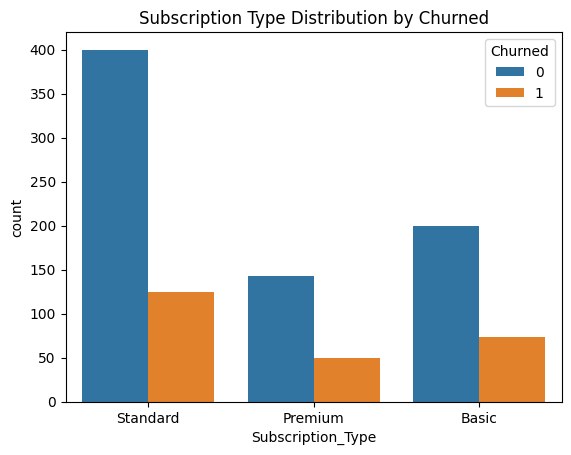

In [118]:

sns.countplot(x='Subscription_Type', hue='Churned', data=df_cleaned)
plt.title('Subscription Type Distribution by Churned')
plt.show()

In [ ]:
churn_rate = df_cleaned['Churned'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 24.90%


In [117]:
df['subscription_duration'] = (df[end_date_col] - df[start_date_col]).dt.days
average_duration = df['subscription_duration'].mean()
print(f'Average Subscription Duration: {average_duration:.2f} days')

Average Subscription Duration: 195.36 days


In [120]:
churn_rate_by_subscription = df_cleaned.groupby('Subscription_Type')['Churned'].mean()
print(churn_rate_by_subscription)

Subscription_Type
Basic       0.268382
Premium     0.255208
Standard    0.236641
Name: Churned, dtype: float64


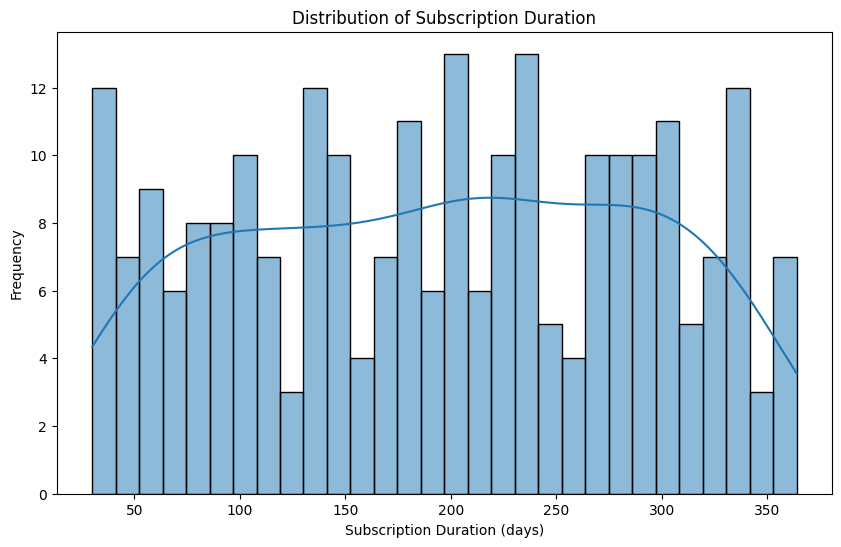

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df['subscription_duration'].dropna(), bins=30, kde=True)
plt.title('Distribution of Subscription Duration')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [121]:

numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr_matrix = numeric_df.corr()

In [ ]:
df['user_id'] = df['User_ID']

In [122]:
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

print(df_cleaned.dtypes)


numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

User_ID                      int64
Age                          int64
Gender                      object
Location                    object
Subscription_Start_Date     object
Subscription_Type           object
Monthly_Payment            float64
Payment_Method              object
Monthly_Hours_Watched      float64
Favorite_Genre              object
Devices_Used                object
Average_Session_Length     float64
Content_ID                   int64
Rating_Given                 int64
Churned                      int64
Date_of_Churn               object
Reason_for_Churn            object
dtype: object


In [123]:
corr_matrix = numeric_df.corr()

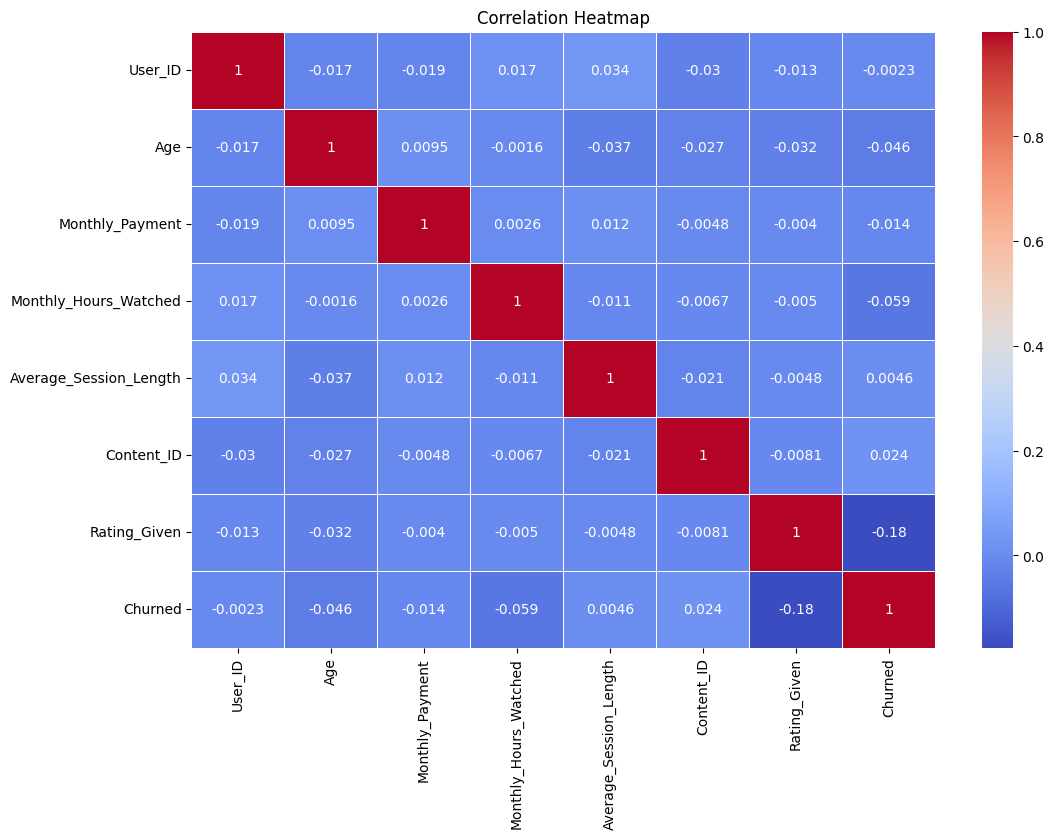

In [124]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [131]:
df['subscription_duration'] = (df[end_date_col] - df[start_date_col]).dt.days
average_duration = df['subscription_duration'].mean()

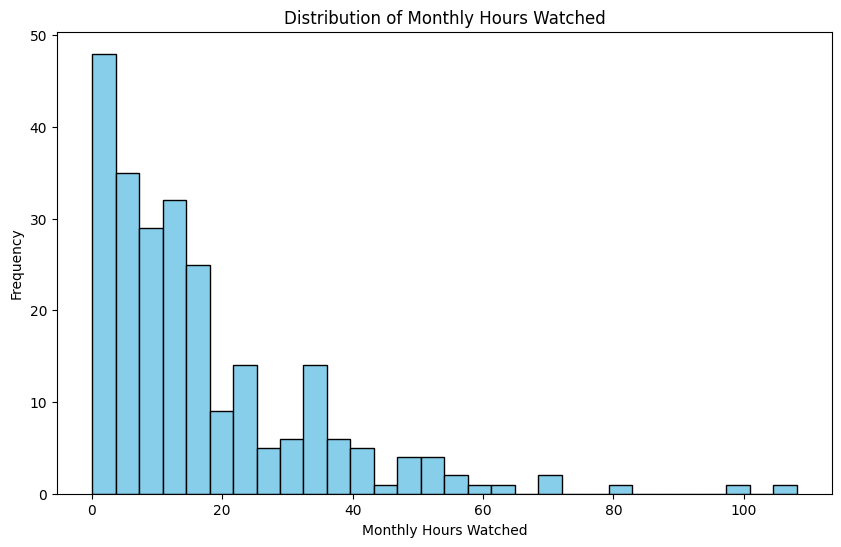

In [126]:
plt.figure(figsize=(10, 6))
plt.hist(df['Monthly_Hours_Watched'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Hours Watched')
plt.xlabel('Monthly Hours Watched')
plt.ylabel('Frequency')
plt.show()